# Data Munging Exercise

In this exercise, you will work with the titanic dataset from one of the previous lessons.
Your task is to prepare a complete dataset ready for modelling by treating and fixing mising data in the dataset

You can follow the workflow in the notes. No additional hints will be provided for this exercise.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [7]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [8]:
df.Embarked.fillna('C',inplace=True)

In [9]:
median_fare=df.loc[(df.Pclass==3)& (df.Embarked=='S'),'Fare'].median()

In [10]:
median_fare

8.05

In [11]:
df.Fare.fillna(median_fare,inplace=True)

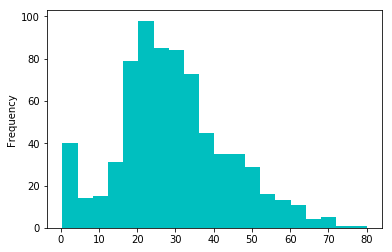

In [13]:
% %matplotlib inline
df.Age.plot(kind='hist',bins=20,color='c')

In [14]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64